In [12]:
import image_anomaly_detection as iad
import torch
from torch.utils.data import DataLoader


In [13]:
class_name = 'bottle'
data_path = '../../data/mvtec_dataset/' 
test_dataset = iad.MVTecDataset(data_path, class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32, pin_memory=True)
print("Number of images in dataset:", len(test_dataloader.dataset))

Number of images in dataset: 83


In [14]:
distributions_path = '../distributions/'
embedding_coreset = torch.load(distributions_path+'bottle_embedding_coreset.pt')

In [15]:
model = iad.PatchCore('resnet18', embedding_coreset=embedding_coreset)

In [16]:
images, image_classifications_target, masks_target, image_scores, score_maps = iad.eval_data(model, test_dataloader)

Inference: 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]


Image level
ROC-AUC score: 1.0

Optimal thresh: 1.8868254
Recall: 1.0
Precision: 1.0


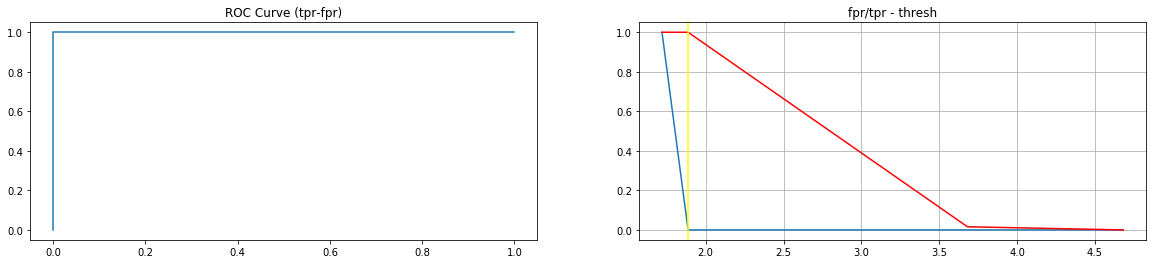

Pixel level
ROC-AUC score: 0.9754587499831969

Optimal thresh: 2.2851136
Recall: 0.7761684842837563
Precision: 0.5636663458411487


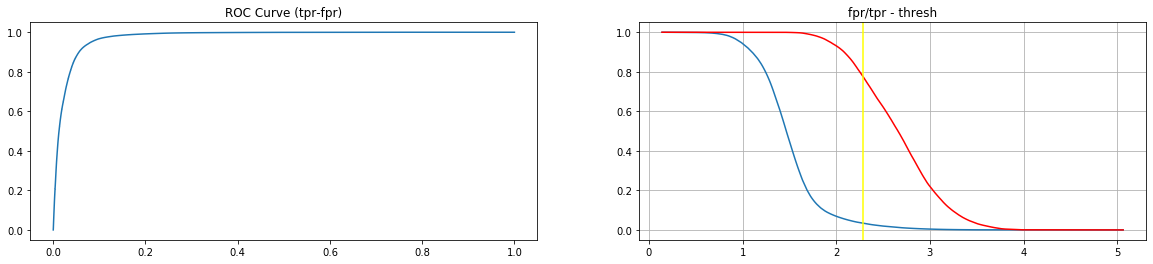

In [17]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)

In [18]:
distributions_path = '../distributions/'
mean = torch.load(distributions_path+'bottle_mean.pt')
cov_inv = torch.load(distributions_path+'bottle_cov_inv.pt')

In [19]:
model = iad.Padim(backbone='resnet18', mean=mean, cov_inv=cov_inv, device=torch.device('cpu'))

In [20]:
images, image_classifications_target, masks_target, image_scores, score_maps = iad.eval_data(model, test_dataloader)

Inference: 100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


Image level
ROC-AUC score: 0.996031746031746

Optimal thresh: 16.869349
Recall: 1.0
Precision: 0.984375


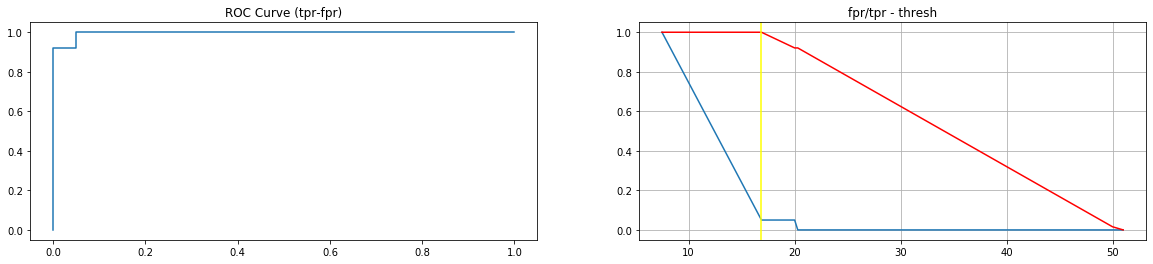

Pixel level
ROC-AUC score: 0.9840468286438052

Optimal thresh: 14.131464
Recall: 0.8013904657653216
Precision: 0.6387621997166169


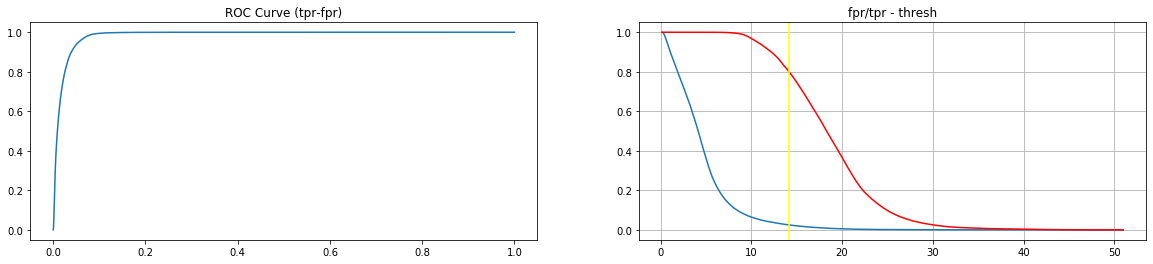

In [21]:
iad.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)